In [60]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('./1st_2nd_tiers_top_5_leagues.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.dropna()

,year,country,league,tier,team,position,squad_depth,avg_age,foreigners,avg_market_value,market_value,has_relegated,has_promoted,has_won_titles,will_promote,will_relegate
20,2005,GB,Premier-League,1,Chelsea FC,1.0,30,25.3,21,12110000,363430000,False,False,True,False,False
21,2005,GB,Premier-League,1,Manchester United,2.0,34,25.4,21,7490000,254580000,False,False,False,False,False
22,2005,GB,Premier-League,1,Arsenal FC,4.0,37,24.1,30,6280000,232330000,False,False,True,False,False
23,2005,GB,Premier-League,1,Liverpool FC,3.0,37,24.9,27,5850000,216350000,False,False,True,False,False
24,2005,GB,Premier-League,1,Tottenham Hotspur,5.0,32,26.3,16,4820000,154330000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,2023,FR,Ligue-2,2,FC Annecy,14.0,32,27.0,10,430000,13750000,False,False,False,False,False
4241,2023,FR,Ligue-2,2,Grenoble Foot 38,11.0,30,26.3,16,445000,13350000,False,False,False,False,False
4242,2023,FR,Ligue-2,2,Quevilly - Rouen Métropole,18.0,33,25.9,13,400000,13200000,False,True,False,False,True
4243,2023,FR,Ligue-2,2,Stade Lavallois,7.0,31,28.4,11,397000,12300000,False,False,False,False,False


In [62]:
df.dtypes

year                  int64
country              object
league               object
tier                  int64
team                 object
position            float64
squad_depth           int64
avg_age             float64
foreigners            int64
avg_market_value      int64
market_value          int64
has_relegated        object
has_promoted         object
has_won_titles         bool
will_promote         object
will_relegate        object
dtype: object

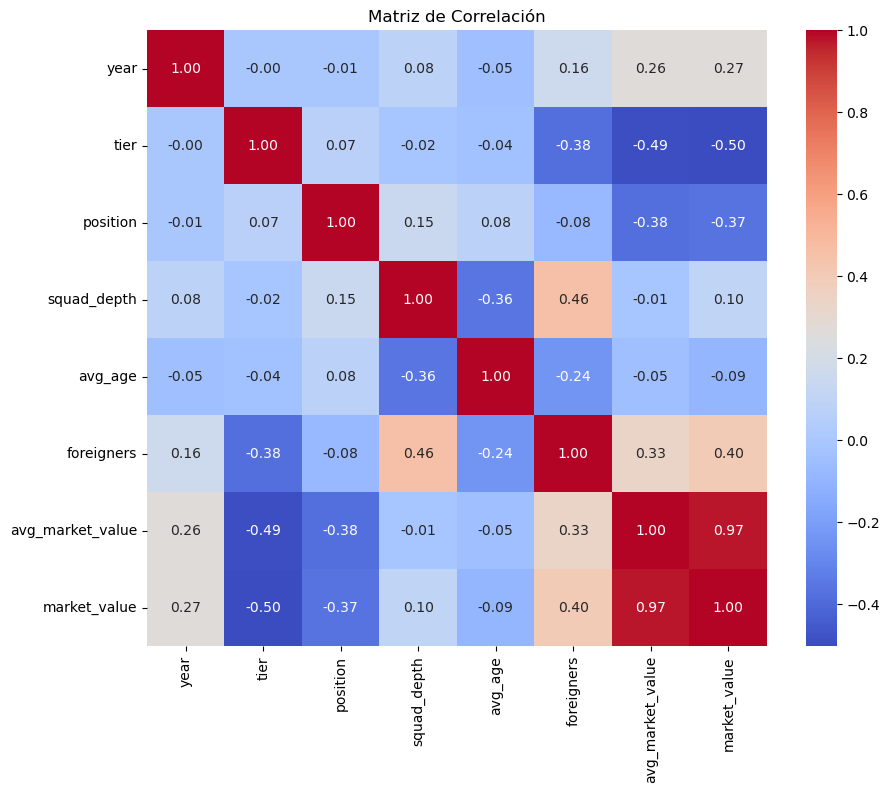

In [63]:
numerical_columns = df.select_dtypes(include=['number'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Título
plt.title("Matriz de Correlación")
plt.show()

C:\Users\Tore\AppData\Local\Temp\ipykernel_19484\4225618667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tier1.drop(columns=['year', 'tier', 'position'], inplace=True)
C:\Users\Tore\AppData\Local\Temp\ipykernel_19484\4225618667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tier1.dropna(inplace=True)


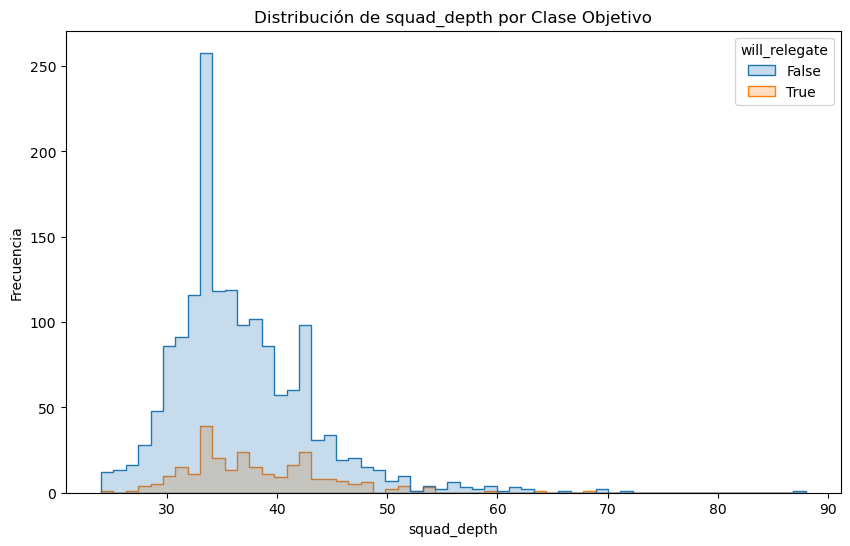

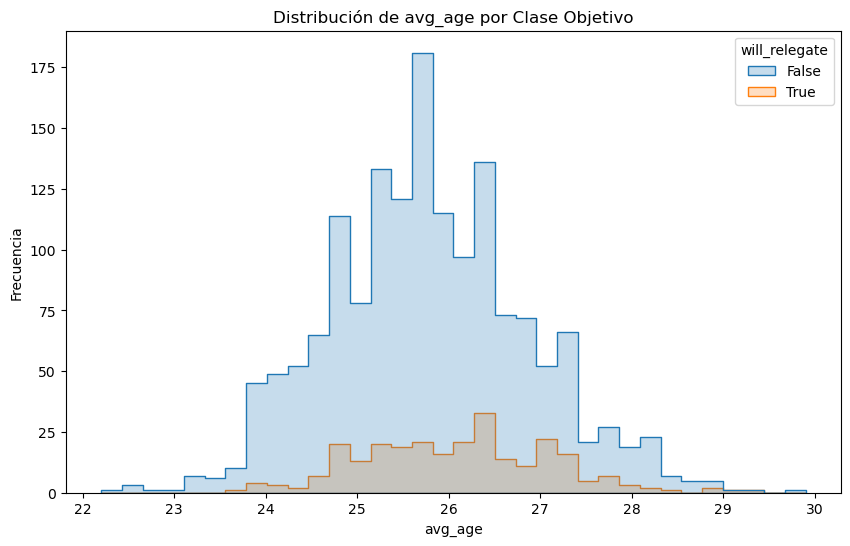

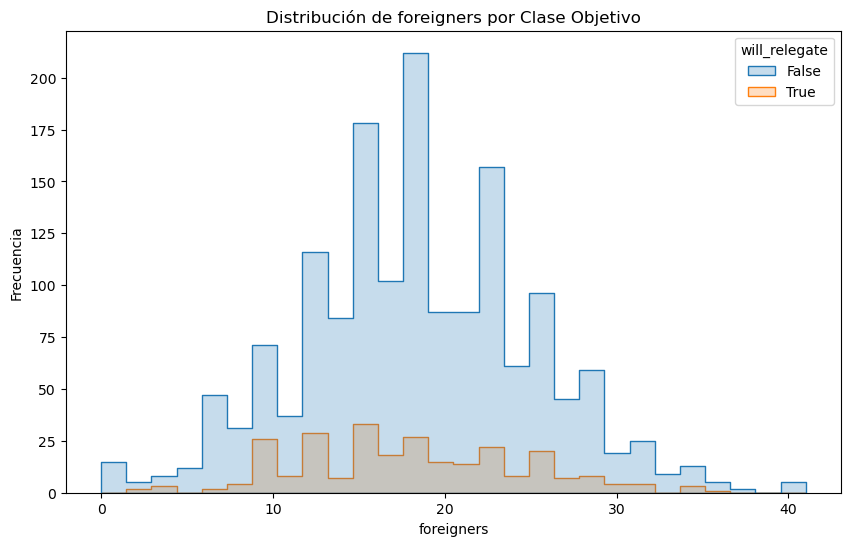

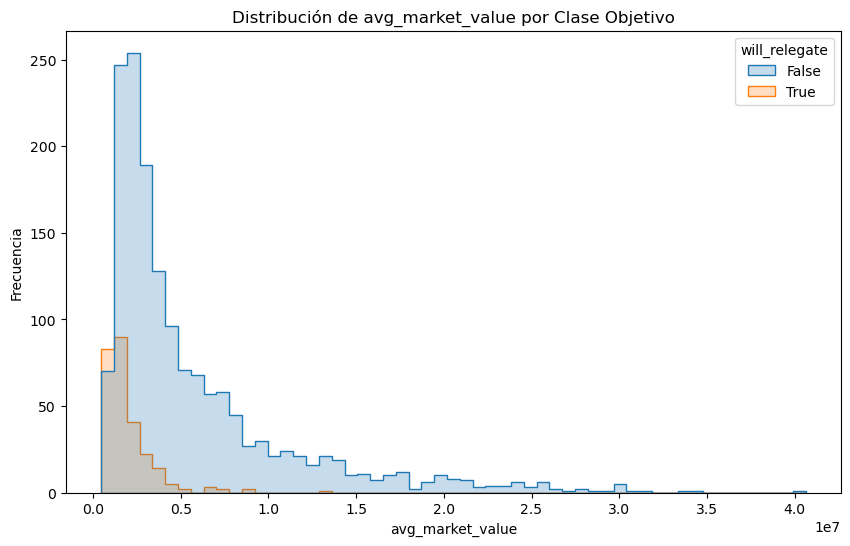

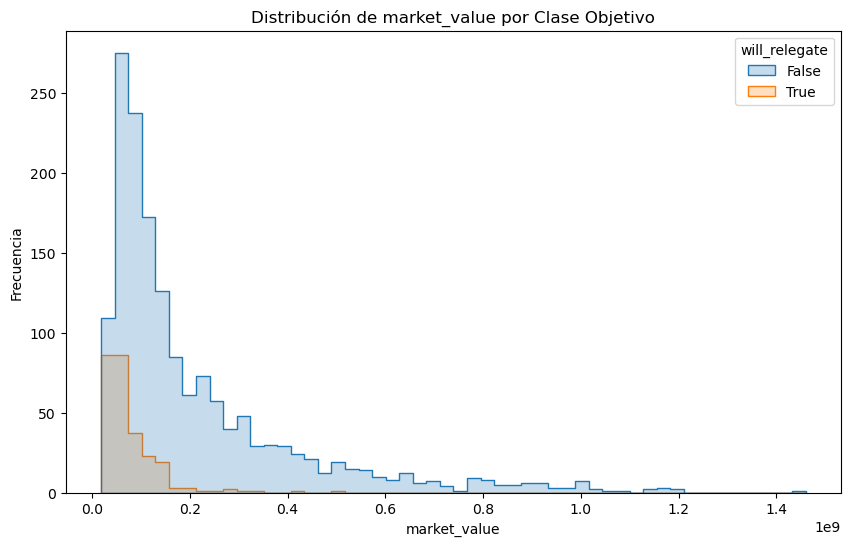

In [66]:
data_tier1 = df[df['tier'] == 1]
data_tier1.drop(columns=['year', 'tier', 'position'], inplace=True)
data_tier1.dropna(inplace=True)
numerical_columns = data_tier1.select_dtypes(include=['float', 'int']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_tier1, x=col, hue='will_relegate', kde=False, element='step')
    plt.title(f"Distribución de {col} por Clase Objetivo")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()